In [4]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import keras
import numpy as np

/home/aswin/.local/lib/python2.7/site-packages/requests/__init__.py:83: RequestsDependencyWarning: Old version of cryptography ([1, 2, 3]) may cause slowdown.
  warnings.warn(warning, RequestsDependencyWarning)
W1212 13:25:00.207704 140456696198912 deprecation.py:323] From /home/aswin/.local/lib/python2.7/site-packages/tensorflow/python/compat/v2_compat.py:61: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
Instructions for updating:
non-resource variables are not supported in the long term
Using TensorFlow backend.


In [11]:
hidden_sizes=(300,)
num_actions = 6
num_states = 7
hidden_sizes*=1

In [12]:
list(hidden_sizes)+[num_actions]

[300, 6]

In [13]:
def ANN(x, layer_sizes, hidden_activation=tf.nn.relu, output_activation=None):
    for h in layer_sizes[:-1]:
        if h< 6:
            x = tf.layers.dense(x, units=6, activation=hidden_activation)
        else:
            x = tf.layers.dense(x, units=h, activation=hidden_activation)
    return tf.layers.dense(x, units=layer_sizes[-1], activation=output_activation)

In [14]:
s = tf.placeholder(dtype=tf.float32, shape=(None, num_states)) 
mu = ANN(s, list(hidden_sizes)+[num_actions])

In [15]:
mu

<tf.Tensor 'dense_5/BiasAdd:0' shape=(?, 6) dtype=float32>

In [16]:
x = [[0,1,1,1,1,1,1]]
x = np.array(x)
x.shape

(1, 7)

In [17]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter("output", sess.graph)
    print(sess.run(mu,feed_dict={s: x}))
    writer.close()

[[-1.2753016   0.8843298   0.7992557   0.00914446  0.5399685   0.0891228 ]]


In [10]:
% tensorboard --logdir= output

UsageError: Line magic function `%tensorboard` not found.


In [5]:
data = np.load('ddpg_results.npz')

In [6]:
data

In [7]:
data.files

['test', 'q_losses', 'train', 'mu_losses']

In [21]:
mulosses = data['mu_losses']

In [22]:
import matplotlib.pyplot as plt


In [23]:
losses.size

0

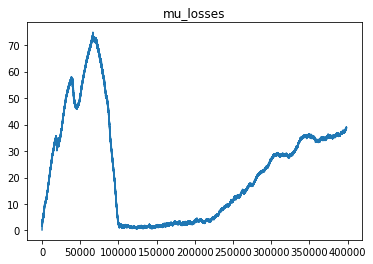

In [24]:
plt.plot(mulosses)
plt.title('mu_losses')
plt.show()

In [3]:
plt.plot(data['train'])
#plt.plot(smooth(np.array(data['train'])))
plt.title("Train returns")
plt.show()

plt.plot(data['test'])
#plt.plot(smooth(np.array(data['test'])))
plt.title("Test returns")
plt.show()

plt.plot(data['q_losses'])
plt.title('q_losses')
plt.show()


NameError: name 'plt' is not defined

In [62]:
from keras.models import Sequential,Model
from keras.layers import Flatten , Dense, Activation, Input


def Nue_net(s, input_size, layer_size, hidden_activation='relu', output_activation = 'tanh'):
    
    input = Input(tensor=s)
    x = Dense(6, activation = hidden_activation)(input)
    for i in layer_size[:-1]:
        x = Dense(i, activation = hidden_activation)(x)
    x = Dense(layer_size[-1], activation = output_activation)
    model = Model(inputs=input, outputs=x)
    return model


In [44]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import numpy as np

In [63]:
hidden_sizes=(300,)
num_action = 6
hidden_sizes =list(hidden_sizes)+[num_action]
s = tf.placeholder(dtype=tf.float32, shape=(None, 7))
mod = Nue_net(s , 7, hidden_sizes)

ValueError: Output tensors to a Model must be the output of a Keras `Layer` (thus holding past layer metadata). Found: <keras.layers.core.Dense object at 0x7f266c72e110>

In [50]:
mod
x = [[0,1,1,1,1,1,1]]
x = np.array(x)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(mod,feed_dict={input: x}))


TypeError: Fetch argument <keras.layers.core.Dense object at 0x7f2683fafc90> has invalid type <class 'keras.layers.core.Dense'>, must be a string or Tensor. (Can not convert a Dense into a Tensor or Operation.)

In [30]:
def Nue_net2(s, input_size, layer_size, hidden_activation='relu', output_activation = 'tanh'):
    
    #input = Input(shape=(None,input_size))
    inp = Dense(6, activation = hidden_activation)(s)
    x = Sequential()
    x.add(s)
    for i in layer_size[2:-1]:
            x.add(Dense(i, activation = hidden_activation))
    x.add(Dense(layer_size[-1], activation = output_activation))
    
    return x

In [31]:
mod = Nue_net2(s, 7, hidden_sizes)

TypeError: The added layer must be an instance of class Layer. Found: Tensor("Placeholder_1:0", shape=(?, 6), dtype=float32)

In [27]:
a = [100, 1]

In [29]:
for h in a[:-1]:
    print(h)

100


In [2]:
from keras.models import Sequential,Model
from keras.layers import Dense, Activation, Input
from keras import backend as K
import tensorflow as tf
sess = tf.Session()


#K.set_session(sess)

def Network(s, layer_size, hidden_activation='relu', output_activation = 'tanh'):
    
    x = Dense(12, activation = hidden_activation)(s)
    for i in layer_size[1:-1]:
        x = Dense(i, activation = hidden_activation)(x)
    x = Dense(layer_size[-1], activation = output_activation)(x)
    
    return x

In [12]:
s = tf.placeholder(dtype=tf.float32, shape=(None, 7))
mod = Network(s,[300, 6])
init_op = tf.global_variables_initializer()
sess.run(init_op)


In [13]:
x = [[0,1,1,1,1,1,1]]
import numpy as np
x = np.array(x)
with sess.as_default():
    a = sess.run(mod,feed_dict={s:x})
    print(a)
    

[[-0.13837005  0.04582888 -0.26645142 -0.7535116  -0.13896585  0.18148653]]
